In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [513]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
rewards_fix = pd.read_csv('rewards_opp.csv', names=['reward'])
decays = pd.read_csv('models/decays.csv', names=['decays'])

In [514]:
decays.tail()

,decays
4120,1.125543e-09
4121,1.119930e-09
4122,1.114344e-09
4123,1.108786e-09
4124,1.103256e-09


In [515]:
metrics.shape, winrates.shape

((4124, 6), (825, 3))

In [516]:
rewards_rl.shape, rewards_fix.shape

((298, 1), (126, 1))

In [517]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_fix_no_dubs = rewards_fix.drop_duplicates()

In [518]:
rewards_rl_no_dubs.shape, rewards_fix_no_dubs.shape

((192, 1), (57, 1))

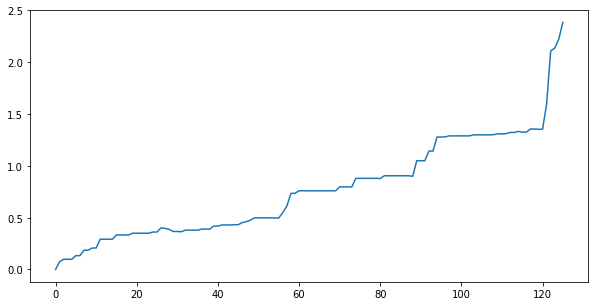

In [519]:
plt.figure(figsize=(10,5))
plt.plot(rewards_fix.index, rewards_fix.reward)
plt.show()

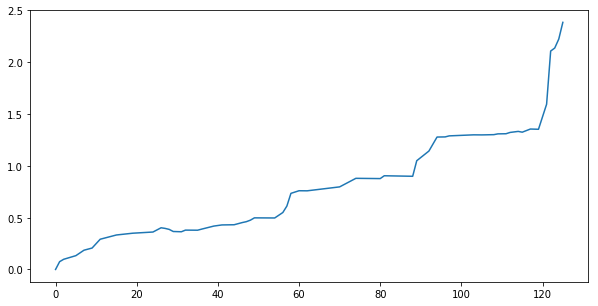

In [520]:
plt.figure(figsize=(10,5))
plt.plot(rewards_fix_no_dubs.index, rewards_fix_no_dubs.reward)
plt.show()

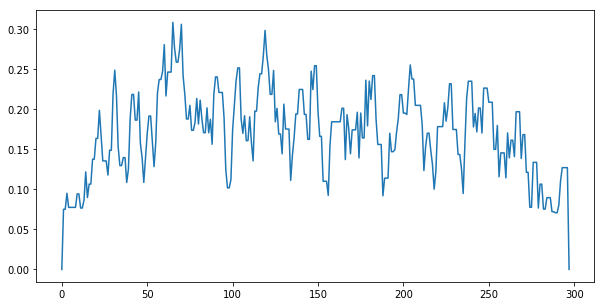

In [521]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

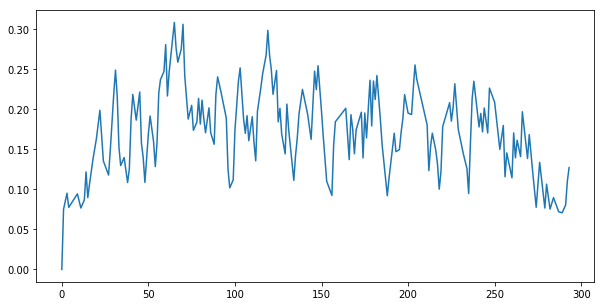

In [522]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

In [523]:
shifted_sigmoid = lambda x: 1 / (1 + np.exp(-(x))) 
rational_sigmoid = lambda x, c: (x - 1500) / (c + np.abs(x - 1500))

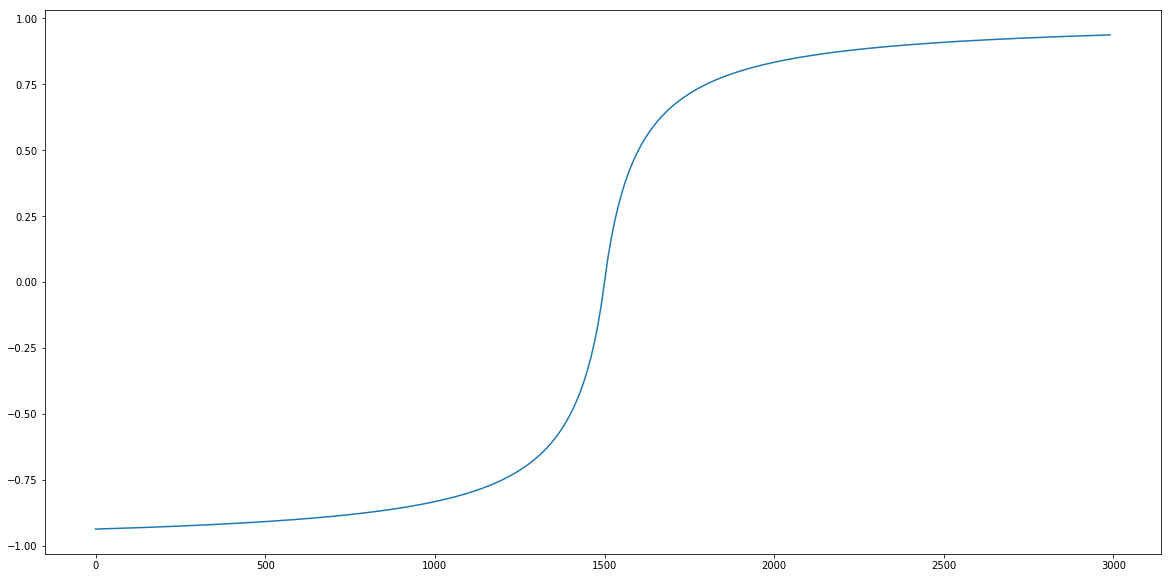

In [524]:
x = np.array(list(range(0, 3000, 10)))
plt.figure(figsize=(20,10))
plt.plot(x, rational_sigmoid(x, 100))
plt.show()

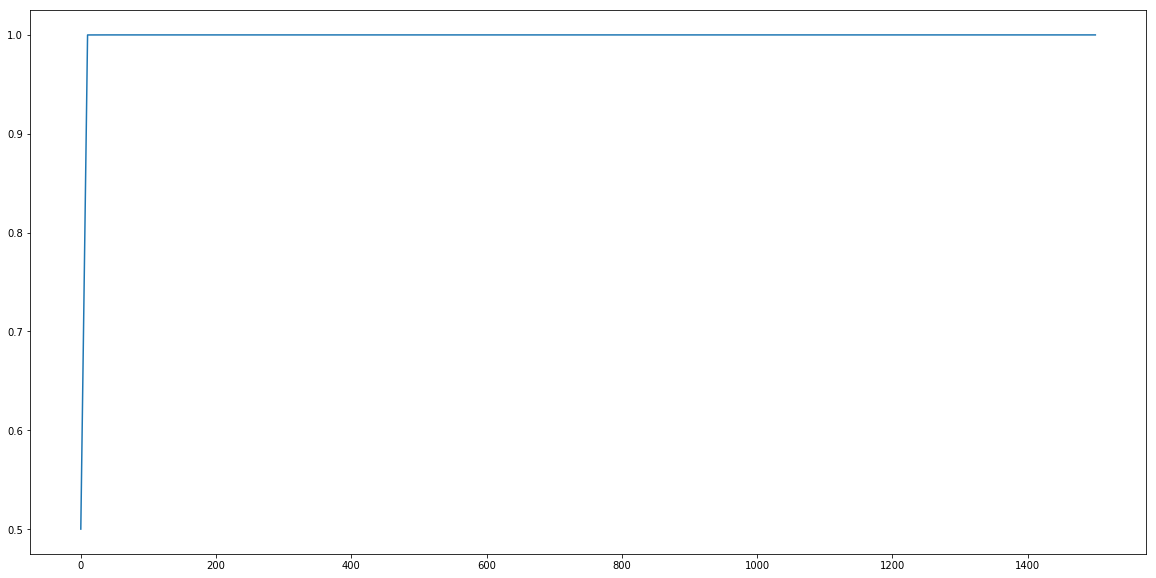

In [525]:
money = list(range(0, 1501, 10))
y = [shifted_sigmoid(x) for x in money]
plt.figure(figsize=(20,10))
plt.plot(money, y)
plt.show()

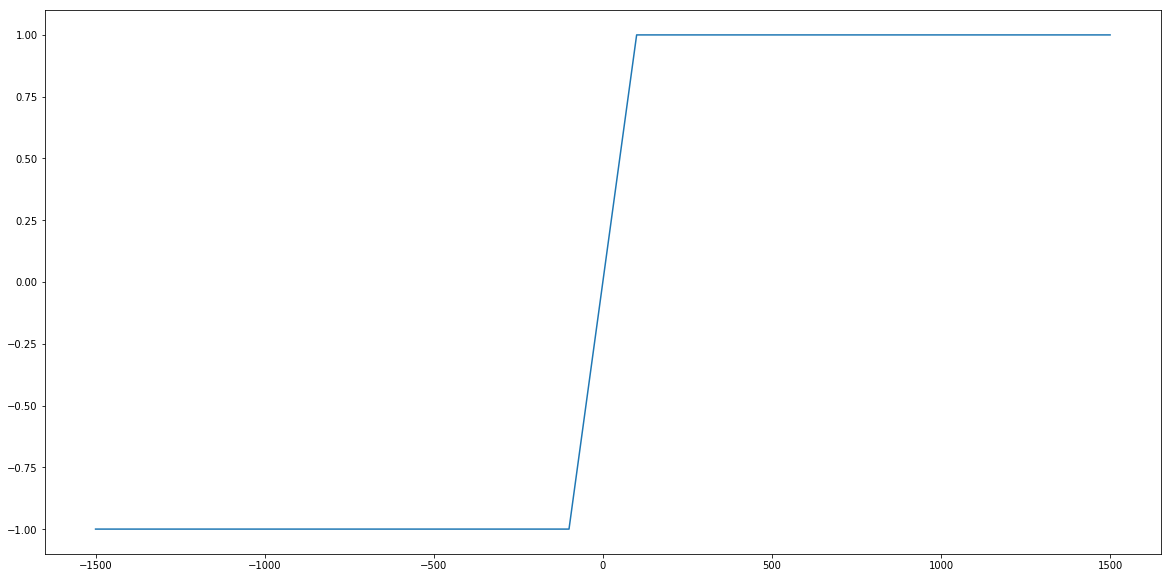

In [6]:
money = list(range(-1500, 1501, 100))
y = [np.tanh(x) for x in money]
plt.figure(figsize=(20,10))
plt.plot(money, y)
plt.show()

In [102]:
shifted_sigmoid(1400)

3.7200759760208356e-44

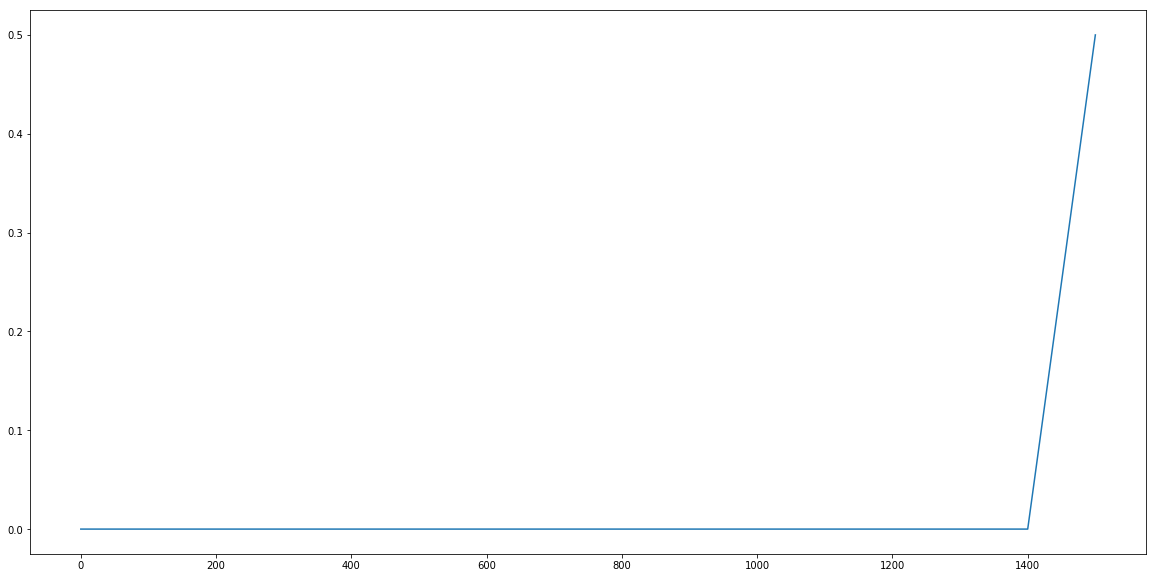

In [36]:
metrics.head()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median
0,0,1,1.521888,1.521888,0.377524,0.377524
1,1,1,1.242404,1.242404,0.276059,0.276059
2,2,1,1.940309,1.940309,-0.034938,-0.034938
3,3,1,1.423852,1.423852,-0.026250,-0.026250
4,4,1,1.716935,1.716935,-0.145755,-0.145755


In [37]:
winrates.head()

,episode,vs_random,vs_fixed
0,0,50.0,0.0
1,10,100.0,0.0
2,20,100.0,0.0
3,30,100.0,0.0
4,40,100.0,0.0


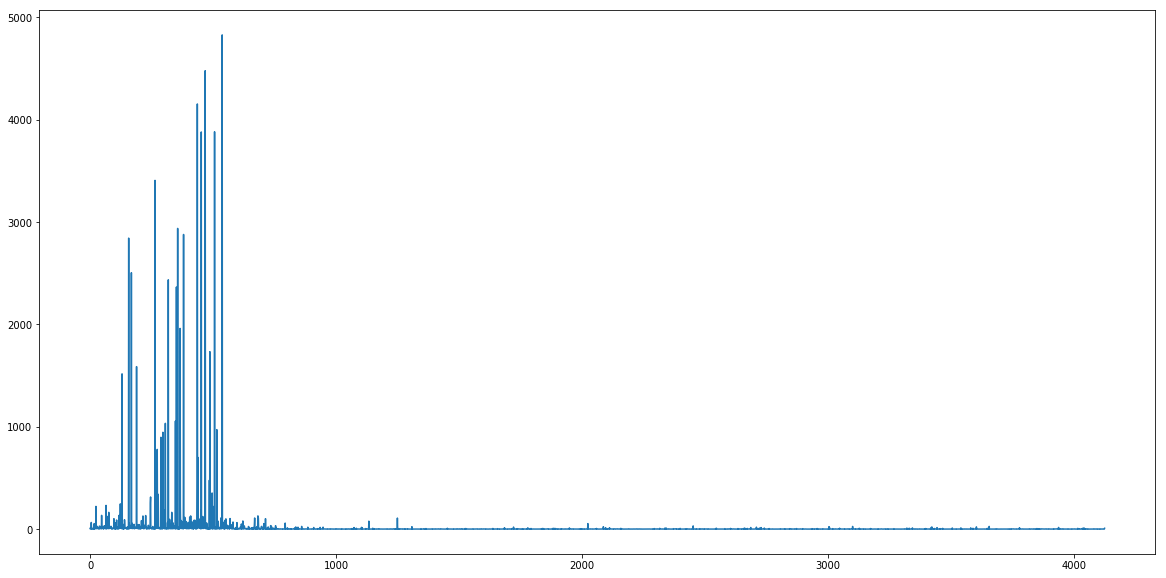

In [526]:
plt.figure(figsize=(20,10))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

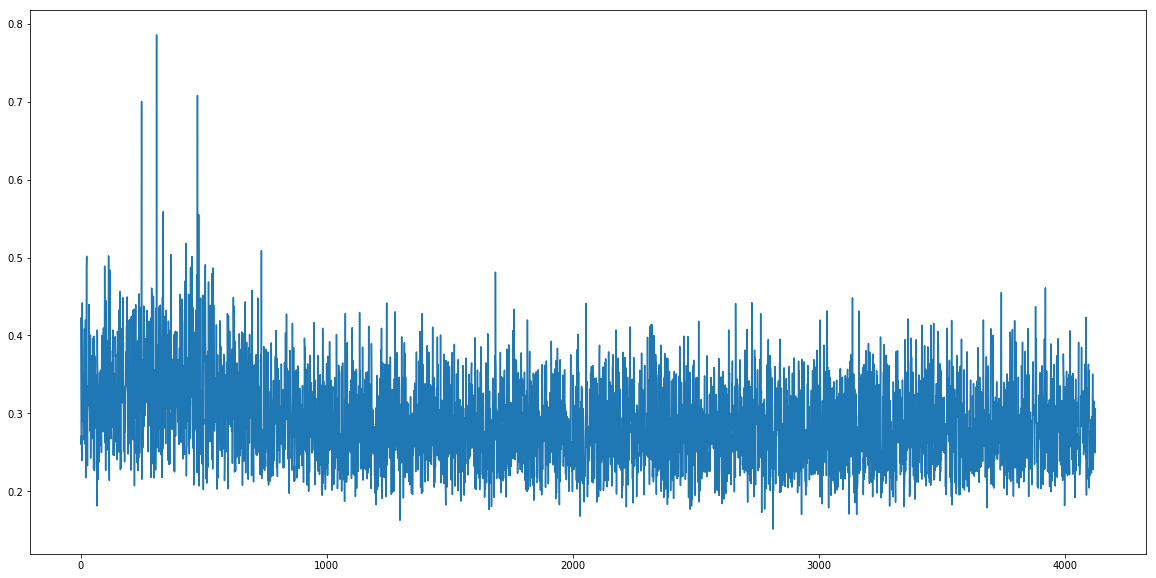

In [527]:
plt.figure(figsize=(20,10))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

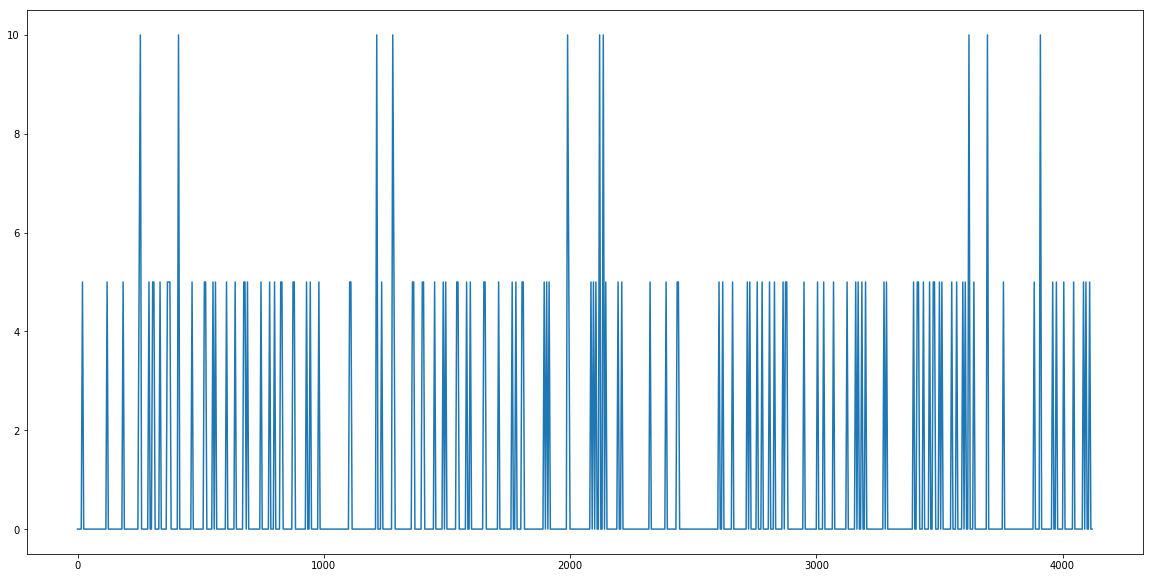

In [530]:
plt.figure(figsize=(20,10))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

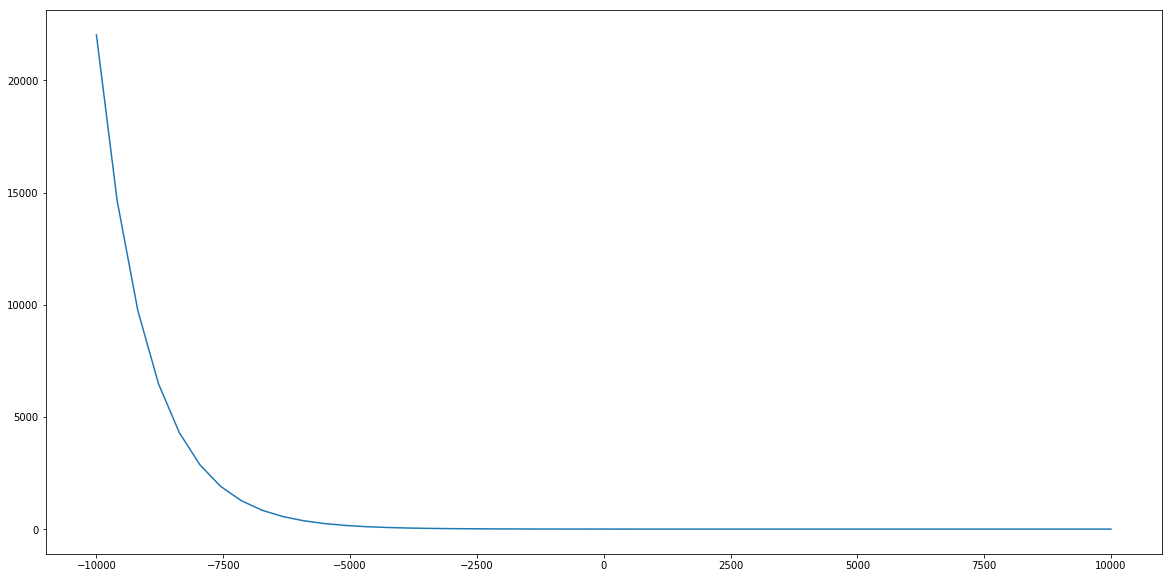

In [84]:
x = np.linspace(-10000, 10000)
y = np.exp(-x * 0.001)
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.show()

In [76]:
np.exp(0)

1.0

In [481]:
np.exp(-150 * 0.01)

0.22313016014842982

In [482]:
import torch
a = torch.tensor([1, 2, 3])

In [483]:
str(a)

'tensor([1, 2, 3])'